In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from google.colab import drive
import requests
import bs4 as bs
import glob
from numpy.linalg import norm
# from scipy.ndimage import imread
import pickle
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
from PIL import Image
from time import sleep
%matplotlib inline

In [2]:
drive.mount("/content/drive", force_remount=True)
data_path = "/content/drive/Shareddrives/PokémonSerina/1-50"
other_path = "/content/drive/Shareddrives/PokémonSerina/All_Pokemons"

Mounted at /content/drive


In [3]:
pokemon_dirs = os.listdir(data_path)
for pokemon_name in pokemon_dirs:
  try:
    os.mkdir(other_path + "/" + pokemon_name)
    print("Done " + pokemon_name)
  except:
    print("This Directory Already Exists")

This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Directory Already Exists
This Direc

In [4]:
def show_image(image, title):
  if len(image.shape) == 2:
    plt.imshow(image, cmap = "gray", interpolation = "bicubic", vmin = 0, vmax = 255)
  else:
    plt.imshow(image, interpolation = "bicubic", vmin = 0, vmax = 255)
  plt.title = title
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [5]:
def compute_palette(img):
    """
    Return palette in descending order of frequency
    """
    arr = np.asarray(img)
    palette, index = np.unique(asvoid(arr).ravel(), return_inverse=True)
    palette = palette.view(arr.dtype).reshape(-1, arr.shape[-1])
    count = np.bincount(index)
    order = np.argsort(count)
    return palette[order[::-1]]

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    http://stackoverflow.com/a/16216866/190597 (Jaime)
    http://stackoverflow.com/a/16840350/190597 (Jaime)
    Warning:
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

In [6]:
def resize_image(image):
  h, w, _ = image.shape
  ratio = np.float(w) / h
  new_h = np.sqrt(6400.0 / ratio)
  new_w = ratio * new_h
  image = cv2.resize(image, (int(new_w), int(new_h)))
  return image

In [7]:
pokemon_dirs = os.listdir(data_path)
pokemon_names = {}
for dir in pokemon_dirs:
  pokemon_names[dir] = []

In [8]:
counter = 0
for pokemon_name in pokemon_names.keys():
  if counter == 50:
    break
  counter += 1
  new_path = data_path + "/" + pokemon_name
  print(new_path)
  for single_image in os.listdir(new_path):
    img_path = new_path + "/" + single_image
    pokemon_img = cv2.imread(img_path)
    pokemon_names[pokemon_name].append(pokemon_img)

/content/drive/Shareddrives/PokémonSerina/1-50/1.Bulbasaur
/content/drive/Shareddrives/PokémonSerina/1-50/2.Ivysaur
/content/drive/Shareddrives/PokémonSerina/1-50/3.Venusaur
/content/drive/Shareddrives/PokémonSerina/1-50/7.Squirtle
/content/drive/Shareddrives/PokémonSerina/1-50/10.Caterpie
/content/drive/Shareddrives/PokémonSerina/1-50/12.Butterfree
/content/drive/Shareddrives/PokémonSerina/1-50/13.Weedle
/content/drive/Shareddrives/PokémonSerina/1-50/9.Blastoise
/content/drive/Shareddrives/PokémonSerina/1-50/6.Charizard
/content/drive/Shareddrives/PokémonSerina/1-50/8.Wartortle
/content/drive/Shareddrives/PokémonSerina/1-50/11.Metapod
/content/drive/Shareddrives/PokémonSerina/1-50/5.Charmaleon
/content/drive/Shareddrives/PokémonSerina/1-50/15.Beedrill
/content/drive/Shareddrives/PokémonSerina/1-50/14.Kakuna
/content/drive/Shareddrives/PokémonSerina/1-50/17.Pidgeotto
/content/drive/Shareddrives/PokémonSerina/1-50/22.Fearow
/content/drive/Shareddrives/PokémonSerina/1-50/21.Spearow
/cont

In [ ]:
new_path = data_path + "/" + "1.Bulbasaur"
os.listdir(new_path)

['11673.jpg',
 '10355.jpg',
 '11105.jpg',
 '12423.jpg',
 '13132.jpg',
 '13980.jpg',
 '6401.jpg',
 '9785.jpg',
 '8461.jpg',
 '9033.jpg',
 '0.jpg',
 '153.jpg',
 '711.jpg',
 '305.jpg',
 '989.jpg',
 '1267.jpg',
 '457.jpg',
 '1823.jpg',
 '1545.jpg',
 '2101.jpg',
 '3402.jpg',
 '2982.jpg',
 '2563.jpg',
 '4136.jpg',
 '4555.jpg',
 '3822.jpg',
 '3979.jpg',
 '00000011.png',
 '00000007.jpg',
 '00000012.png',
 '00000010.png',
 '00000006.jpg',
 '00000014.png',
 '00000001.png',
 '00000004.png',
 '00000008.png',
 '00000003.png',
 '00000000.png',
 '00000013.png',
 '00000005.png',
 '00000025.jpg',
 '00000021.png',
 '00000017.png',
 '00000027.png',
 '00000024.png',
 '00000020.png',
 '00000026.png',
 '00000019.jpg',
 '00000015.jpg',
 '00000022.png',
 '00000023.jpg',
 '00000032.jpg',
 '00000074.png',
 '00000081.jpg',
 '00000085.png',
 '00000158.png',
 '00000153.jpg',
 '00000138.png',
 '00000097.png',
 '00000176.png',
 '09937bd03d6647b98b71b5d4110489c9.jpg',
 'c9c697a6cd984bbbb7286c84082ca81d.jpg',
 '24e259

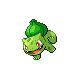

88

In [ ]:
cv2_imshow(pokemon_names["1.Bulbasaur"][0])
len(pokemon_names["1.Bulbasaur"])

['10868.jpg', '11618.jpg', '12186.jpg', '13650.jpg', '12936.jpg', '14498.jpg', '5603.jpg', '6346.jpg', '7650.jpg', '6907.jpg', '8975.jpg', '8222.jpg', '9548.jpg', '10299.jpg', '250.jpg', '49.jpg', '934.jpg', '554.jpg', '402.jpg', '1212.jpg', '2324.jpg', '2046.jpg', '1490.jpg', '1768.jpg', '2927.jpg', '3347.jpg', '4499.jpg', '3924.jpg', '4081.jpg', '3767.jpg', '4919.jpg', '444450cc8f2c4b0c885561dcdc6ac31e.jpg', '3d5d7f18d0a74ef19d2fc521bf19926a.jpg', 'be7800ca79fb4df09849a8e7d7232a07.jpg', '241cc31c18f34ca2bdf01f99e37edf1e.jpg', '1a07e5b4cd5c40dd80eb0e53d13dee71.jpg', '53530546d52d407999bd5a1008272b33.jpg', '816b7b3f258e476e8ab7cad66d302448.jpg', 'diglett_0.jpg', 'diglett_1.jpg', 'diglett_2.jpg', 'diglett_3.jpg', 'diglett_4.jpg', 'diglett_5.jpg', 'diglett_6.jpg', 'diglett_7.jpg', 'diglett_8.jpg', 'diglett_9.jpg', 'diglett_10.jpg', 'diglett_11.jpg', 'diglett_12.jpg', 'diglett_13.jpg', 'diglett_14.jpg', 'diglett_15.jpg', 'diglett_16.jpg', 'diglett_17.jpg', 'diglett_18.jpg']
0
(80, 80, 3)


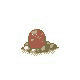

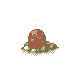

Is it ok?
0
(80, 80, 3)


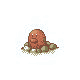

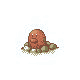

Is it ok?1
1
(80, 80, 3)


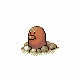

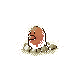

Is it ok?
1
(80, 80, 3)


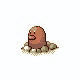

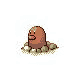

Is it ok?1
2
(80, 80, 3)


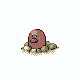

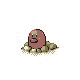

Is it ok?
2
(80, 80, 3)


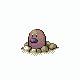

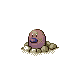

Is it ok?1
3
(80, 80, 3)


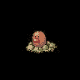

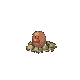

Is it ok?
3
(80, 80, 3)


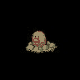

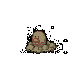

Is it ok?
3
(80, 80, 3)


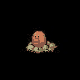

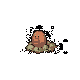

Is it ok?
3
(80, 80, 3)


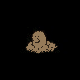

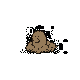

Is it ok?
3
(80, 80, 3)


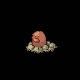

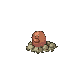

Is it ok?1
4
(80, 80, 3)


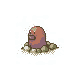

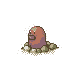

Is it ok?1
5
(80, 80, 3)


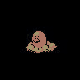

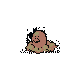

Is it ok?
5
(80, 80, 3)


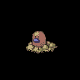

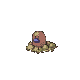

Is it ok?1
6
(80, 80, 3)


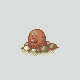

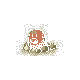

Is it ok?
6
(80, 80, 3)


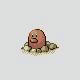

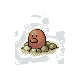

Is it ok?
6
(80, 80, 3)


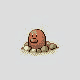

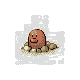

Is it ok?
6
(80, 80, 3)


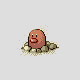

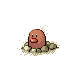

Is it ok?1
7
(80, 80, 3)


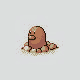

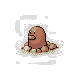

Is it ok?
7
(80, 80, 3)


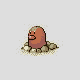

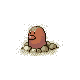

Is it ok?
7
(80, 80, 3)


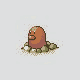

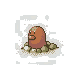

Is it ok?
7
(80, 80, 3)


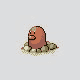

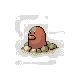

Is it ok?
7
(80, 80, 3)


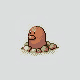

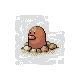

Is it ok?
7
(80, 80, 3)


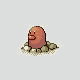

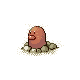

Is it ok?1
8
(80, 80, 3)


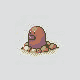

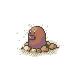

Is it ok?
8
(80, 80, 3)


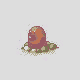

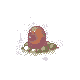

Is it ok?
8
(80, 80, 3)


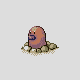

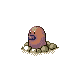

Is it ok?1
9
(80, 80, 3)


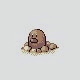

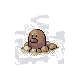

Is it ok?
9
(80, 80, 3)


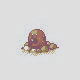

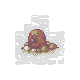

Is it ok?
9
(80, 80, 3)


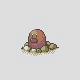

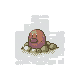

Is it ok?
9
(80, 80, 3)


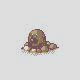

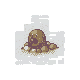

Is it ok?
9
(80, 80, 3)


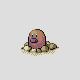

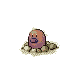

Is it ok?1
10
(80, 80, 3)


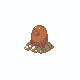

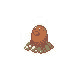

Is it ok?
10
(80, 80, 3)


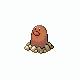

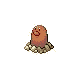

Is it ok?1
11
(80, 80, 3)


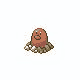

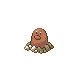

Is it ok?1
12
(80, 80, 3)


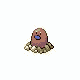

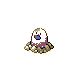

Is it ok?
12
(80, 80, 3)


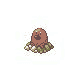

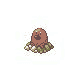

Is it ok?1
13
(80, 80, 3)


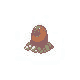

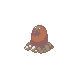

Is it ok?
13
(80, 80, 3)


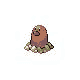

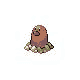

Is it ok?1
14
(80, 80, 3)


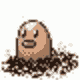

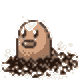

Is it ok?1
15
(80, 80, 3)


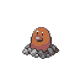

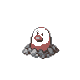

Is it ok?
15
(80, 80, 3)


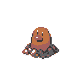

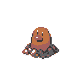

Is it ok?1
16
(80, 80, 3)


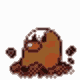

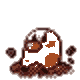

Is it ok?
16
(80, 80, 3)


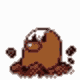

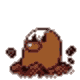

Is it ok?1
17
(80, 80, 3)


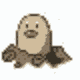

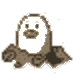

Is it ok?
17
(80, 80, 3)


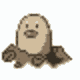

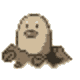

Is it ok?1
18
(80, 80, 3)


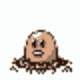

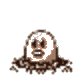

Is it ok?
18
(80, 80, 3)


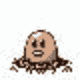

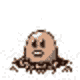

Is it ok?1
19
(80, 80, 3)


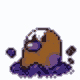

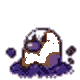

Is it ok?
19
(80, 80, 3)


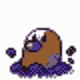

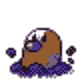

Is it ok?1
20
(80, 80, 3)


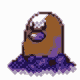

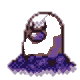

Is it ok?
20
(80, 80, 3)


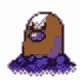

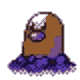

Is it ok?1
21
(80, 80, 3)


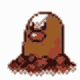

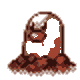

Is it ok?
21
(80, 80, 3)


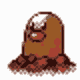

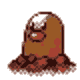

Is it ok?1
22
(80, 80, 3)


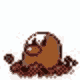

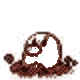

Is it ok?
22
(80, 80, 3)


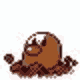

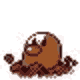

Is it ok?1
23
(80, 80, 3)


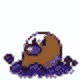

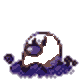

Is it ok?
23
(80, 80, 3)


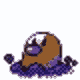

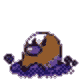

Is it ok?1
24
(80, 80, 3)


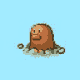

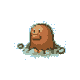

Is it ok?1
25
(80, 80, 3)


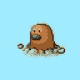

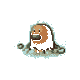

Is it ok?
25
(80, 80, 3)


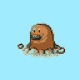

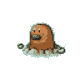

Is it ok?1
26
(80, 80, 3)


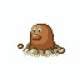

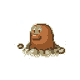

Is it ok?1
27
(80, 80, 3)


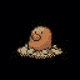

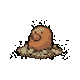

Is it ok?
27
(80, 80, 3)


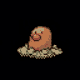

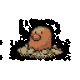

Is it ok?
27
(80, 80, 3)


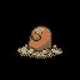

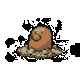

Is it ok?
27
(80, 80, 3)


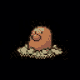

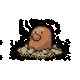

Is it ok?
27
(80, 80, 3)


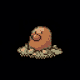

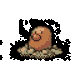

Is it ok?
27
(80, 80, 3)


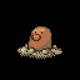

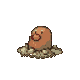

Is it ok?1
28
(80, 80, 3)


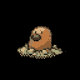

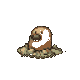

Is it ok?
28
(80, 80, 3)


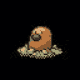

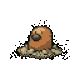

Is it ok?
28
(80, 80, 3)


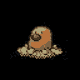

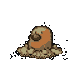

Is it ok?
28
(80, 80, 3)


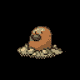

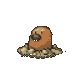

Is it ok?1
29
(80, 80, 3)


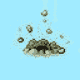

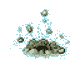

Is it ok?
29
(80, 80, 3)


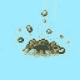

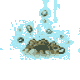

Is it ok?
29
(80, 80, 3)


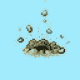

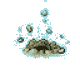

Is it ok?
29
(80, 80, 3)


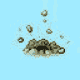

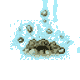

Is it ok?
29
(80, 80, 3)


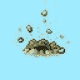

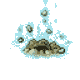

Is it ok?
29
(80, 80, 3)


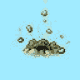

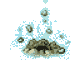

Is it ok?
29
(80, 80, 3)


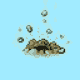

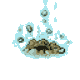

Is it ok?
29
(80, 80, 3)


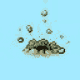

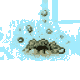

Is it ok?
29
(80, 80, 3)


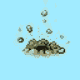

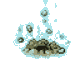

Is it ok?
29
(80, 80, 3)


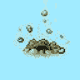

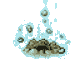

Is it ok?
29
(80, 80, 3)


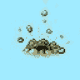

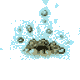

Is it ok?
29
(80, 80, 3)


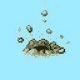

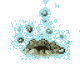

Is it ok?
29
(80, 80, 3)


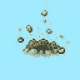

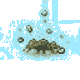

Is it ok?
29
(80, 80, 3)


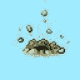

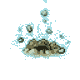

Is it ok?1
30
(80, 80, 3)


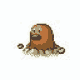

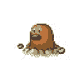

Is it ok?1
31
(80, 80, 3)


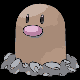

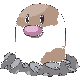

Is it ok?
31
(80, 80, 3)


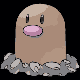

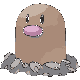

Is it ok?1
32
(95, 66, 3)


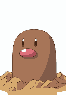

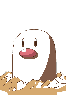

Is it ok?
32
(95, 66, 3)


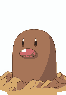

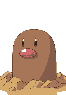

Is it ok?1
33
(72, 88, 3)


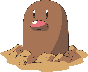

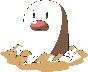

Is it ok?
33
(72, 88, 3)


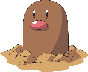

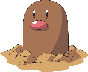

Is it ok?1
34
(74, 86, 3)


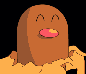

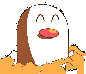

Is it ok?
34
(74, 86, 3)


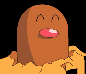

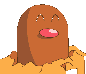

Is it ok?1
35
(78, 81, 3)


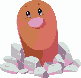

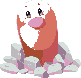

Is it ok?
35
(78, 81, 3)


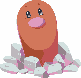

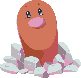

Is it ok?1
36
(76, 83, 3)


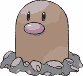

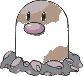

Is it ok?
36
(76, 83, 3)


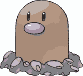

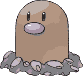

Is it ok?1
37
(80, 80, 3)


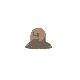

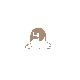

Is it ok?
37
(80, 80, 3)


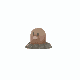

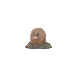

Is it ok?1
38
(76, 83, 3)


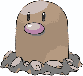

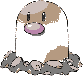

Is it ok?
38
(76, 83, 3)


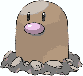

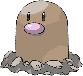

Is it ok?1
39
(80, 80, 3)


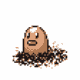

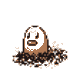

Is it ok?
39
(80, 80, 3)


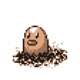

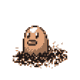

Is it ok?1
40
(80, 80, 3)


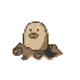

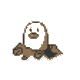

Is it ok?
40
(80, 80, 3)


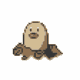

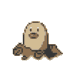

Is it ok?1
41
(80, 80, 3)


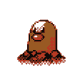

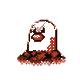

Is it ok?
41
(80, 80, 3)


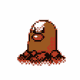

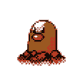

Is it ok?1
42
(80, 80, 3)


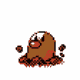

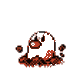

Is it ok?
42
(80, 80, 3)


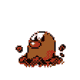

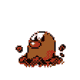

Is it ok?1
43
(80, 80, 3)


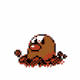

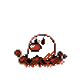

Is it ok?
43
(80, 80, 3)


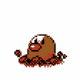

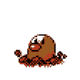

Is it ok?1
44
(80, 80, 3)


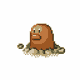

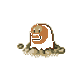

Is it ok?
44
(80, 80, 3)


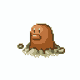

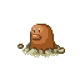

Is it ok?1
45
(80, 80, 3)


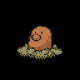

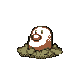

Is it ok?
45
(80, 80, 3)


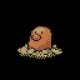

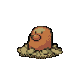

Is it ok?1
46
(80, 80, 3)


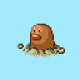

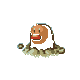

Is it ok?
46
(80, 80, 3)


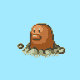

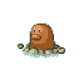

Is it ok?1
47
(80, 80, 3)


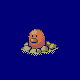

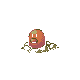

Is it ok?
47
(80, 80, 3)


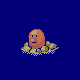

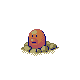

Is it ok?1
48
(80, 80, 3)


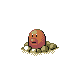

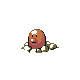

Is it ok?
48
(80, 80, 3)


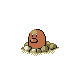

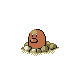

Is it ok?1
49
(80, 80, 3)


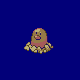

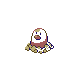

Is it ok?
49
(80, 80, 3)


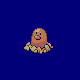

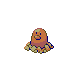

Is it ok?1
50
(80, 80, 3)


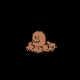

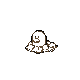

Is it ok?
50
(80, 80, 3)


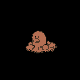

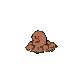

Is it ok?
50
(80, 80, 3)


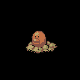

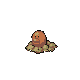

Is it ok?1
51
(80, 80, 3)


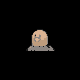

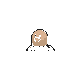

Is it ok?
51
(80, 80, 3)


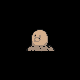

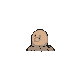

Is it ok?1
52
(80, 80, 3)


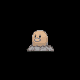

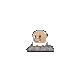

Is it ok?
52
(80, 80, 3)


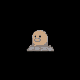

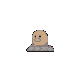

Is it ok?1
53
(73, 87, 3)


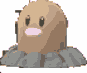

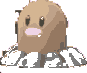

Is it ok?
53
(73, 87, 3)


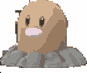

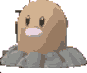

Is it ok?1
54
(80, 80, 3)


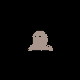

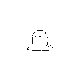

Is it ok?
54
(80, 80, 3)


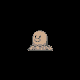

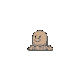

Is it ok?
54
(80, 80, 3)


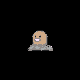

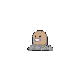

Is it ok?1
55
(80, 80, 3)


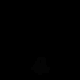

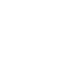

Is it ok?
55
(80, 80, 3)


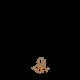

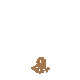

Is it ok?
55
(80, 80, 3)


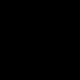

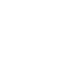

Is it ok?
55
(80, 80, 3)


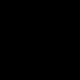

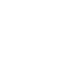

Is it ok?
55
(80, 80, 3)


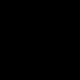

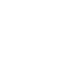

Is it ok?
55
(80, 80, 3)


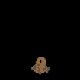

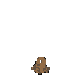

Is it ok?
55
(80, 80, 3)


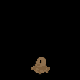

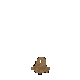

Is it ok?
55
(80, 80, 3)


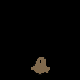

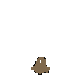

Is it ok?
55
(80, 80, 3)


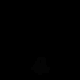

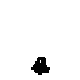

Is it ok?
55
(80, 80, 3)


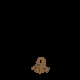

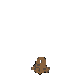

Is it ok?1
56
(80, 80, 3)


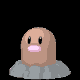

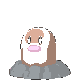

Is it ok?
56
(80, 80, 3)


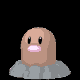

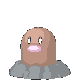

Is it ok?1


In [11]:
name = "50.Diglett"
k = len(os.listdir(other_path + "/" + name))
no_count = 0
index_1 = 0
index_2 = 1
img_names_list = os.listdir(data_path + "/" + name)
print(img_names_list)
while k < len(pokemon_names[name]):
  print(k)
  new_path = data_path + "/" + name
  pokemon_img = pokemon_names[name][k]
  image = pokemon_img[:]
  image = resize_image(image)
  print(image.shape)
  (h, w) = image.shape[:2]
  # convert the image from the RGB color space to the L*a*b*
  # color space -- since we will be clustering using k-means
  # which is based on the euclidean distance, we'll use the
  # L*a*b* color space where the euclidean distance implies
  # perceptual meaning
  image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  # reshape the image into a feature vector so that k-means
  # can be applied
  image = image.reshape((image.shape[0] * image.shape[1], 3))
  # apply k-means using the specified number of clusters and
  # then create the quantized image based on the predictions
  clt = MiniBatchKMeans(n_clusters = 10)
  labels = clt.fit_predict(image)
  quant = clt.cluster_centers_.astype("uint8")[labels]
  # reshape the feature vectors to images
  quant = quant.reshape((h, w, 3))
  image = image.reshape((h, w, 3))
  # convert from L*a*b* to RGB
  quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
  image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
  # display the images and wait for a keypress
  cv2_imshow(np.hstack([quant]))
  palette = compute_palette(quant)
  new_quant = np.ones(quant.shape, dtype=quant.dtype)
  new_quant = np.multiply(new_quant, quant)
  if no_count == 1:
    no_count = 0
    index_2 = index_1
  else:
    index_2 = 1
  for i in range(new_quant.shape[0]):
    for j in range(new_quant.shape[1]):
      if np.linalg.norm(new_quant[i, j] - palette[index_1]) < 0.1 or np.linalg.norm(new_quant[i, j] - palette[index_2]) < 0.1:
        new_quant[i, j] = np.array([255,255,255])

  cv2_imshow(new_quant)
  try:
    yes = int(input("Is it ok?"))
  except:
    no_count += 1
    continue
  if yes == 1:
    string_name = name.split('.')[1]
    # cv2.imwrite(new_path + "/" + string_name + str(k) + ".jpg", new_quant)
    cv2.imwrite(other_path + "/" + name + "/" + string_name + str(k) + ".jpg", new_quant)
    removal_path = data_path + "/" + name + "/"
    os.remove(removal_path + img_names_list[k])
    k += 1
    continue
  elif yes == 2:
    break
  else:
    no_count += 1
  sleep(1)
  # cv2.waitKey(0)
  # show_image(np.hstack([quant]), "")

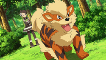

(60, 106, 3)

In [ ]:
image = cv2.imread("./tmp/Arcanine.jpg")
image = resize_image(image)
cv2_imshow(image)
image.shape

In [ ]:
name = "4.Charamander/Test"
new_path = data_path + "/" + name
os.remove(new_path + ".jpg")

In [ ]:
name = "4.Charamander"
len(os.listdir(other_path + "/" + name))

57